# Part 2: Affine Factorization

Q matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         3.19281142]]


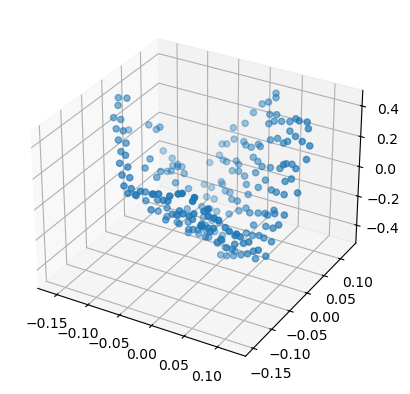

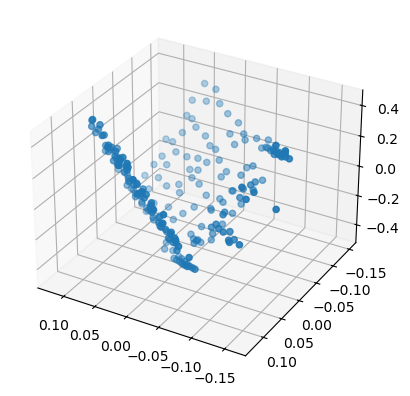

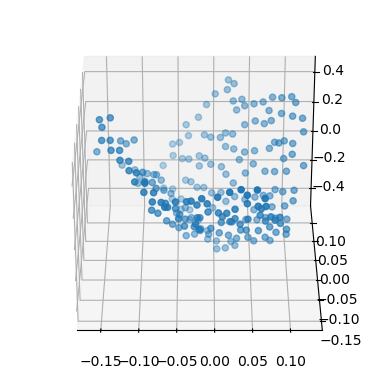

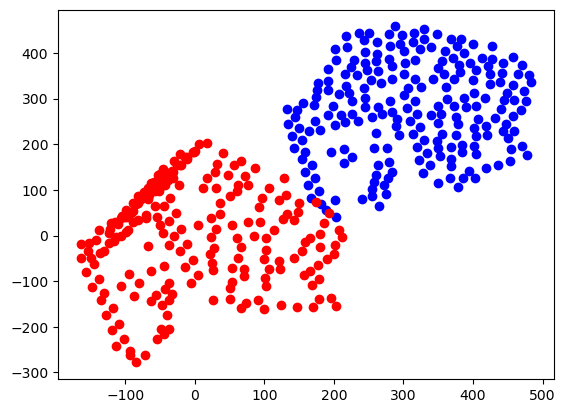

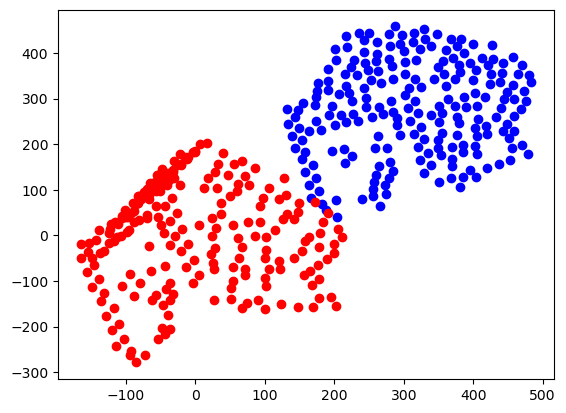

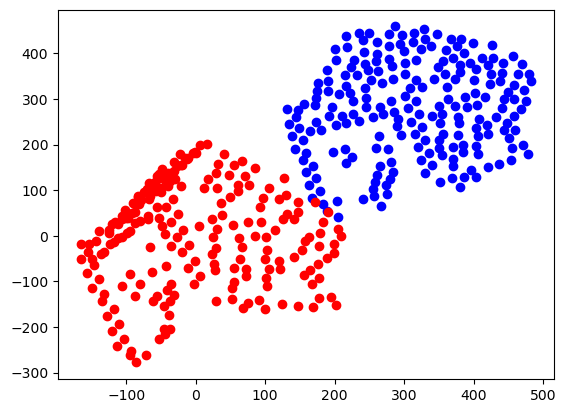

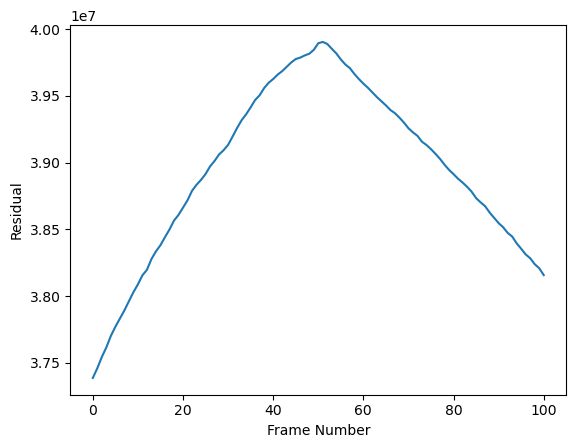

Total Residual: 3933824413.5820193


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the measurement matrix
data_matrix = np.loadtxt('mp5_part2_factorization_data/measurement_matrix.txt')

# Normalize the point coordinates
num_points = data_matrix.shape[1] // 2
num_frames = data_matrix.shape[0] // 2
normalized_data_matrix = np.zeros_like(data_matrix)
for i in range(num_frames):
    frame_data = data_matrix[2*i:2*i+2, :]
    mean_x = np.mean(frame_data[0, :])
    mean_y = np.mean(frame_data[1, :])
    normalized_data_matrix[2*i:2*i+2, :] = frame_data - np.array([[mean_x], [mean_y]])

U, W, Vt = np.linalg.svd(normalized_data_matrix)

structure_matrix = Vt.T[:, :3]
motion_matrix = U[:, :3] @ np.diag(W[:3])

motion_matrix = motion_matrix.reshape((num_frames, 2, 3))

# Find the matrix Q to eliminate the affine ambiguity
Q = np.array([[1, 0, 0], [0, 1, 0], [0, 0, np.sqrt(W[0]/W[2])]])
print(f"Q matrix\n{Q}")
reconstructed_structure = structure_matrix @ Q

# Display the 3D structure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed_structure[:, 0], reconstructed_structure[:, 1], reconstructed_structure[:, 2])
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed_structure[:, 0], reconstructed_structure[:, 1], reconstructed_structure[:, 2])
ax.view_init(elev=30, azim=120)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed_structure[:, 0], reconstructed_structure[:, 1], reconstructed_structure[:, 2])
ax.view_init(elev=30, azim=270)
plt.show()

for i in range(3):
    frame_data = data_matrix[2*i:2*i+2, :]
    projected_points = motion_matrix[i, :, :] @ reconstructed_structure.T
    plt.scatter(frame_data[0, :], frame_data[1, :], c='b')
    plt.scatter(projected_points[0, :], projected_points[1, :], c='r')
    plt.show()

total_residual = 0
per_frame_residuals = []
for i in range(num_frames):
    frame_data = data_matrix[2*i:2*i+2, :]
    projected_points = motion_matrix[i, :, :] @ reconstructed_structure.T
    residual = np.sum((frame_data - projected_points) ** 2)
    total_residual += residual
    per_frame_residuals.append(residual)

plt.plot(per_frame_residuals)
plt.xlabel('Frame Number')
plt.ylabel('Residual')
plt.show()
print('Total Residual:', total_residual)